#### Hierarchical Clustering (Agglomerative) on n-grams

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%store -r ngramtrain

In [3]:
df = pd.DataFrame(ngramtrain)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.379520,-0.152076,0.164299,-0.260605,-0.555370,-0.449147,0.375688,0.140239,-0.404687,0.170535,...,-0.147169,-0.003854,0.421620,-0.131548,-0.783302,-0.104903,-0.013033,-0.336739,-0.426723,-0.265260
1,0.355087,-0.142812,0.121737,-0.232641,-0.491679,-0.396348,0.340843,0.133631,-0.348016,0.145430,...,-0.121881,0.010025,0.382660,-0.124365,-0.727108,-0.110026,-0.023400,-0.303090,-0.386937,-0.224230
2,0.371677,-0.164805,0.154603,-0.244721,-0.590529,-0.435620,0.358932,0.132503,-0.380974,0.147101,...,-0.152328,-0.015526,0.417187,-0.094420,-0.722133,-0.109605,-0.041019,-0.312155,-0.404749,-0.254256
3,0.336951,-0.121691,0.095535,-0.213793,-0.387230,-0.360023,0.309097,0.117259,-0.299793,0.144345,...,-0.096093,0.023677,0.348297,-0.148542,-0.709970,-0.109010,-0.005879,-0.287717,-0.382139,-0.209512
4,0.328181,-0.125198,0.105028,-0.221979,-0.420180,-0.356786,0.311444,0.125701,-0.314849,0.140924,...,-0.099644,0.013258,0.348730,-0.135317,-0.683202,-0.108050,-0.003507,-0.285391,-0.366516,-0.207449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,0.287346,-0.101472,0.084336,-0.177334,-0.367863,-0.316506,0.265734,0.089956,-0.254770,0.113416,...,-0.089457,0.022158,0.310913,-0.116383,-0.600881,-0.087903,-0.019036,-0.243700,-0.320650,-0.181707
2339,0.326526,-0.125203,0.142286,-0.222401,-0.454464,-0.377196,0.311904,0.118164,-0.342858,0.148584,...,-0.120163,0.003113,0.360308,-0.124837,-0.679510,-0.088851,0.002271,-0.287342,-0.379446,-0.235018
2340,0.326759,-0.139400,0.130477,-0.218388,-0.501017,-0.377243,0.312681,0.115235,-0.326349,0.131481,...,-0.124161,-0.007992,0.366612,-0.095417,-0.645491,-0.099047,-0.028481,-0.276542,-0.361885,-0.223456
2341,0.383185,-0.163811,0.166937,-0.267716,-0.599292,-0.446587,0.369971,0.141802,-0.401252,0.159236,...,-0.150699,-0.025405,0.422775,-0.106346,-0.732650,-0.114205,-0.022285,-0.333409,-0.423036,-0.272277


In [4]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/home/deepti-saravanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X = np.array(ngramtrain)
X

array([[ 0.37952024, -0.15207615,  0.16429871, ..., -0.33673908,
        -0.42672296, -0.26526031],
       [ 0.35508725, -0.1428124 ,  0.12173699, ..., -0.30308996,
        -0.38693738, -0.22423039],
       [ 0.37167682, -0.1648054 ,  0.15460292, ..., -0.3121549 ,
        -0.40474885, -0.25425553],
       ...,
       [ 0.32675896, -0.13940007,  0.13047682, ..., -0.27654171,
        -0.36188479, -0.22345629],
       [ 0.38318453, -0.16381136,  0.16693685, ..., -0.33340908,
        -0.42303568, -0.27227719],
       [ 0.30711145, -0.12209967,  0.11233192, ..., -0.2616961 ,
        -0.34413129, -0.20431659]])

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

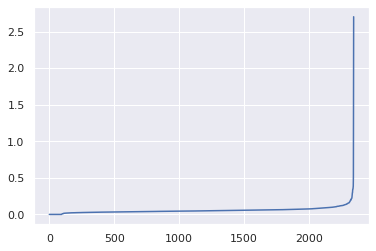

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [8]:
m = DBSCAN(eps=0.2, min_samples=10)
m.fit(X)

DBSCAN(eps=0.2, min_samples=10)

In [9]:
label3 = m.labels_

In [10]:
#Number of clusters obtained
j=[]
for i in label3:
    if(i not in j):
        j.append(i)
j

[0, -1, 1]

In [11]:
colors = ['royalblue', 'maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

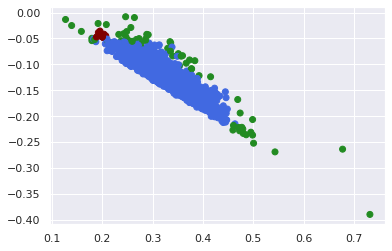

In [13]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(label3))

In [14]:
c0=0
c1=0
c2=0
#c3=0
for i in label3:
    if(i==0):
        c0=c0+1
    elif(i==1):
        c1=c1+1
    #elif(i==2):
    #    c2=c2+1
    else:
        c2=c2+1
print(c0)
print(c1)
print(c2)
#print(c3)

2267
11
65


In [15]:
X0 = ngramtrain

In [16]:
#Cluster-wise separation of regulations' vector values
t=-1
r0 = []
rid0 = []
r1 = []
rid1 = []
r2 = []
rid2 = []
#r3 = []
#rid3 = []
for i in label3:
    t=t+1
    if(i==0):
        r0.append(X0[t])
        rid0.append(t)
    elif(i==1):
        r1.append(X0[t])
        rid1.append(t)
    #elif(i==2):
    #    r2.append(X0[t])
    #    rid2.append(t)
    else:
        r2.append(X0[t])
        rid2.append(t)

In [17]:
#Clusters centroids calculation
#Cluster0
jlist = [0]*100
c=0
s=[]
for i in r0:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent0 = jlist

In [18]:
#Cluster1
jlist = [0]*100
c=0
s=[]
for i in r1:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent1 = jlist

In [19]:
#Cluster2
jlist = [0]*100
c=0
s=[]
for i in r2:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent2 = jlist

In [20]:
#Cosine similarity within cluster - ascending order

from numpy import dot
from numpy.linalg import norm

def takeThird(elem):
    return elem[2]

In [21]:
#Cluster0
cos0 = []
i=0
while(i<len(r0)-1):
    j=len(r0)-1
    while(j>i):
        cos_sim = dot(r0[i], r0[j])/(norm(r0[i])*norm(r0[j]))
        cos0.append([rid0[i],rid0[j],cos_sim])
        j=j-1
    i=i+1
cos0.sort(key=takeThird)

In [22]:
#Sorting regulations with cosine score
ind0 = []
cs_ind0 = []
counter0 = []
for i in cos0:
    if(i[0] not in ind0):
        ind0.append(i[0])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[0]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
    if(i[1] not in ind0):
        ind0.append(i[1])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[1]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind0)):
    cs_ind0[p] = cs_ind0[p]/counter0[p]
    p=p+1
    
zipped_lists = zip(cs_ind0, ind0)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind0, ind0 = [ list(tuple) for tuple in tuples]

In [23]:
#Cluster1
cos1 = []
i=0
while(i<len(r1)-1):
    j=len(r1)-1
    while(j>i):
        cos_sim = dot(r1[i], r1[j])/(norm(r1[i])*norm(r1[j]))
        cos1.append([rid1[i],rid1[j],cos_sim])
        j=j-1
    i=i+1
cos1.sort(key=takeThird)

In [24]:
ind1 = []
cs_ind1 = []
counter1 = []
for i in cos1:
    if(i[0] not in ind1):
        ind1.append(i[0])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[0]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
    if(i[1] not in ind1):
        ind1.append(i[1])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[1]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind1)):
    cs_ind1[p] = cs_ind1[p]/counter1[p]
    p=p+1

zipped_lists = zip(cs_ind1, ind1)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind1, ind1 = [ list(tuple) for tuple in tuples]

In [25]:
#Cluster2
cos2 = []
i=0
while(i<len(r2)-1):
    j=len(r2)-1
    while(j>i):
        cos_sim = dot(r2[i], r2[j])/(norm(r2[i])*norm(r2[j]))
        cos2.append([rid2[i],rid2[j],cos_sim])
        j=j-1
    i=i+1
cos2.sort(key=takeThird)

In [26]:
#Sorting regulations with cosine score
ind2 = []
cs_ind2 = []
counter2 = []
for i in cos2:
    if(i[0] not in ind2):
        ind2.append(i[0])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[0]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
    if(i[1] not in ind2):
        ind2.append(i[1])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[1]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind2)):
    cs_ind2[p] = cs_ind2[p]/counter2[p]
    p=p+1
    
zipped_lists = zip(cs_ind2, ind2)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind2, ind2 = [ list(tuple) for tuple in tuples]

In [32]:
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

1133
1145
65


In [33]:
c0 = len(ind0)
c1 = len(ind1)
c2 = len(ind2)

In [34]:
#Resizing clusters

#Cluster2 - size:781
from scipy.spatial import distance
if(c0>781):
    i = c0-781
    p=0
    while(p<i):
        e1= distance.euclidean(cs_ind0[p], cent1)
        e2= distance.euclidean(cs_ind0[p], cent2)
        #e3= distance.euclidean(cs_ind0[p], cent3)
        e = min(e1,e2)
        if(e1 == e):
            cs_ind1.append(cs_ind0[p])
            ind1.append(ind0[p])
        #elif(e2 == e):
        #    cs_ind2.append(cs_ind0[p])
        #    ind2.append(ind0[p])
        #    y=0
        #    for ic in rid0:
        #        if(ic == ind0[p]):
        #            label4[y] = 2
        #            break
        #        y=y+1
        else:
            cs_ind2.append(cs_ind0[p])
            ind2.append(ind0[p])
            
        cs_ind0.remove(cs_ind0[p])
        ind0.remove(ind0[p])
        p=p+1

In [35]:
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

781
1497
65


In [36]:
#Cluster1 and 0 - size:781
c2 = len(ind2)
c1 = len(ind1)
if(c2>781):
    i = c2-781
    p=0
    while(p<i):
        cs_ind1.append(cs_ind2[p])
        ind1.append(ind2[p])
        
        cs_ind2.remove(cs_ind2[p])
        ind2.remove(ind2[p])
        p=p+1
else:
    i = c1-781
    p=0
    while(p<i):
        cs_ind2.append(cs_ind1[p])
        ind2.append(ind1[p])
        
        cs_ind1.remove(cs_ind1[p])
        ind1.remove(ind1[p])
        p=p+1

In [37]:
## Cluster sizes - final
print(len(ind0))
print(len(ind1))
print(len(ind2))
#print(len(ind3))

781
781
781


In [38]:
for i in ind0:
    label3[i] = 0
for i in ind1:
    label3[i] = 1
for i in ind2:
    label3[i] = 2

#for i in ind3:
#    label4[i] = 3

In [39]:
kl0=0
kl1=0
kl2=0
#kl3=0

for mass in label3:
    if(mass==0):
        kl0=kl0+1
    elif(mass==1):
        kl1=kl1+1
    #elif(mass==2):
    #    kl2=kl2+1
    else:
        kl2=kl2+1
print(kl0)
print(kl1)
print(kl2)
#print(kl3)

781
781
781


## Topic Analysis - Clusterwise

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from utils import LemmaTokenizer, combined_plots

/home/deepti-saravanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
%store -r lol

In [42]:
counter = CountVectorizer(tokenizer=LemmaTokenizer())
subj = pd.DataFrame(
    counter.fit_transform(lol.astype(str)).toarray(),
    columns=counter.get_feature_names()
)

In [43]:
subj['label'] = label3

In [44]:
groups = pd.melt(
    subj.groupby('label').sum().reset_index(),
    id_vars='label', var_name='word', value_name='count'
).groupby('label').apply(lambda group: group.sort_values(by='count', ascending=False)).reset_index(drop=True)

In [45]:
groups.to_csv('ngram-dbscan.csv',index=False)

In [46]:
pipeline = Pipeline([
    ('counts', CountVectorizer(max_features=100, tokenizer=LemmaTokenizer())),
    ('lda', LatentDirichletAllocation(n_components=3, learning_decay=0.5, max_iter=10, random_state=1))
])

In [47]:
pipeline.fit(lol)

Pipeline(steps=[('counts',
                 CountVectorizer(max_features=100,
                                 tokenizer=<utils.LemmaTokenizer object at 0x7f63d247d278>)),
                ('lda',
                 LatentDirichletAllocation(learning_decay=0.5, n_components=3,
                                           random_state=1))])

In [48]:
vectorizer = pipeline.named_steps['counts']
dtm = vectorizer.fit_transform(lol)

In [49]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [50]:
p = pyLDAvis.sklearn.prepare(pipeline.named_steps['lda'], dtm, vectorizer)

In [51]:
pyLDAvis.display(p)

In [52]:
p_df = p.topic_info
l=0
tlist = []
flist = []
while(l<p_df.shape[0]):
    if(p_df.iloc[l]['Category'] != 'Default'):
        tlist.append(p_df.iloc[l]['Term'])
        flist.append(p_df.iloc[l]['Total'])
    l = l+1

#### Tag words for accounting

In [53]:
acc1 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/ifrs_iasb.csv', usecols=['Term'])
acc2 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/uk_gaap.csv', usecols=['Term'])
acc3 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_fasb.csv', usecols=['Term'])
acc4 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gaap.csv', usecols=['Term'])
acc5 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gasb.csv', usecols=['Term'])

In [54]:
acc1 = acc1.append(acc2)
acc1 = acc1.append(acc3)
acc1 = acc1.append(acc4)
acc1 = acc1.append(acc5)
a11 = acc1.values.tolist()

a1 = []
for i in a11:
    a1.append(i[0])
    
g1 = groups.values.tolist()
g = []
for j in g1:
    g.append(j[1])

In [55]:
account = []

for n in a1:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in account):
                account.append(n)
        k = k+1

In [56]:
account

['accounting',
 'acquirer',
 'acquisition',
 'agency',
 'audit',
 'bond',
 'broker',
 'capital',
 'cash',
 'chairman',
 'charge',
 'control',
 'cost',
 'coupon',
 'credit',
 'debenture',
 'default',
 'director',
 'dividend',
 'entity',
 'equity',
 'expense',
 'format',
 'group',
 'inventory',
 'management',
 'margin',
 'material',
 'materiality',
 'maturity',
 'memorandum',
 'merger',
 'net',
 'partnership',
 'portfolio',
 'principal',
 'profit',
 'prospectus',
 'provision',
 'recognition',
 'return',
 'revenue',
 'risk',
 'stock',
 'substance',
 'turnover',
 'unlisted',
 'agent',
 'asset',
 'associate',
 'business',
 'derivative',
 'development',
 'income',
 'lease',
 'liability',
 'performance',
 'probable',
 'loss',
 'research',
 'restriction',
 'state',
 'subsidiary',
 'vest',
 'yield']

In [57]:
regtext = pd.read_csv('../code/ngram-dbscan.csv')
reg = regtext.values.tolist()
label = []
word = []
freq = []
for i in account:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1]
['accounting', 'accounting', 'accounting', 'acquirer', 'acquirer', 'acquirer', 'acquisition', 'acquisition', 'acquisition', 'agency', 'agency', 'agency', 'audit', 'audit', 'audit', 'bond', 'bond', 'bond', 'broker', 'broker', 'capital', 'capital', 'capital', 'cash', 'cash', 'chairman', 'chairman', 'chairman', 'charge', 'charge', 'charge', 'control', 'control', 'control', 'cost', 'cost', 'cost', 'coupon', 'credit', 'credit', 'credit', 'debenture', 'debenture', 'debenture', 'default', 'default', 'default', 'director', 'director', '

#### Percentage accounting tag words clusterwise

In [58]:
#Word counts clusterwise
k=0
c0 = 0
c1 = 0
c2 = 0
#c3 = 0

while(k<len(reg)):
    r = reg[k]
    if(r[0] == 0):
        c0 = c0 + r[2]
    elif(r[0] == 1):
        c1 = c1 + r[2]
    #elif(r[0] == 2):
    #    c2 = c2 + r[2]
    else:
        c2 = c2 + r[2]
    k=k+1
print(c0)
print(c1)
print(c2)
#print(c3)

5484
5261
6494


In [59]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

12.345003646973012
10.967496673636191
11.595318755774562


#### Relative to global frequency

In [60]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

32.89272659971025
28.33195401530547
38.49614629320296


#### Tag words for finance

In [61]:
fin = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/financial/financial.csv', usecols=['term'])

In [62]:
f1 = fin.values.tolist()
f = []
for i in f1:
    f.append(i[0])

In [63]:
finance = []

for n in f:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in finance):
                finance.append(n)
        k = k+1

In [64]:
label = []
word = []
freq = []
for i in finance:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2]
['account', 'account', 'account', 'asset', 'asset', 'asset', 'basis', 'basis', 'basis', 'broker', 'broker', 'business', 'business', 'business', 'buy', 'buy', 'buy', 'commission', 'commission', 'debenture', 'debenture', 'debenture', 'dividend', 'dividend', 'dividend', 'equity', 'equity', 'equity', 'exchange', 'exchange', 'exchange', 'income', 'income', 'holding', 'holding', 'holding', 'information', 'information', 'information', 'institution', 'institution', 'institution', 'investment', 'investment', 'investment', 'issuer', 'issuer', 'issuer', 'lot', 'maturity', 'option', 'option', 'option', 'portfolio', 'portfolio', 'portfolio', 'price', 'price', 'price', 'principal', 'principal', 'prospectus', 'prospectus', 'quantity', 'right', 'right',

In [65]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

8.13274981765135
7.679148450864854
9.131506005543578


In [66]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

31.298311351725232
28.410842978066526
39.58594749786607


#### Tag words for Banking

In [67]:
bank = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/code/banking.csv')

In [68]:
b1 = bank.values.tolist()
b2 = []
for i in b1:
    b2.append(i[0])

In [69]:
banking = []

for n in b2:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in banking):
                banking.append(n)
        k = k+1

In [70]:
banking

['affidavit',
 'alteration',
 'application',
 'bank',
 'bankruptcy',
 'bond',
 'deposit',
 'collateral',
 'debit',
 'draft',
 'escrow',
 'fiduciary',
 'hold',
 'insurance',
 'lease',
 'lender',
 'lien',
 'maturity',
 'payment',
 'refund',
 'renewal',
 'statement',
 'transfer']

In [71]:
label = []
word = []
freq = []
for i in banking:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
['affidavit', 'affidavit', 'alteration', 'application', 'application', 'application', 'bank', 'bank', 'bank', 'bankruptcy', 'bond', 'bond', 'bond', 'deposit', 'deposit', 'deposit', 'collateral', 'collateral', 'debit', 'draft', 'draft', 'draft', 'escrow', 'escrow', 'escrow', 'fiduciary', 'fiduciary', 'hold', 'hold', 'hold', 'insurance', 'insurance', 'lease', 'lender', 'lien', 'maturity', 'payment', 'payment', 'payment', 'refund', 'refund', 'refund', 'renewal', 'renewal', 'renewal', 'statement', 'statement', 'statement', 'transfer', 'transfer', 'transfer']
[1, 1, 1, 50, 37, 49, 14, 8, 10, 3, 3, 1, 4, 1, 2, 2, 1, 1, 1, 8, 10, 15, 1, 7, 1, 1, 1, 10, 11, 12, 1, 4, 4, 1, 2, 1, 7, 12, 4, 2, 4, 3, 2, 1, 4, 13, 11, 16, 6, 6, 8]


In [72]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

2.297592997811816
2.128872837863524
2.1712349861410534


In [73]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

37.49366213240687
27.74530997798108
36.743788889758726


#### Tag words for Capital Market

In [74]:
cap = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CapMarket.csv')

In [75]:
capm1 = cap.values.tolist()
c = []
for i in capm1:
    c.append(i[0])

In [76]:
cap_market = []

for n in c:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in cap_market):
                cap_market.append(n)
        k = k+1

In [77]:
cap_market

['acquirer',
 'adviser',
 'analyst',
 'intermediary',
 'arbitration',
 'securities',
 'bond',
 'auditor',
 'authorized',
 'authority',
 'basis',
 'broker',
 'brokerage',
 'market',
 'clearing',
 'coupon',
 'cover',
 'custodian',
 'delivery',
 'dematerialise',
 'depository',
 'derivative',
 'disclosure',
 'distribution',
 'dividend',
 'equity',
 'ex',
 'exchange',
 'hypothecation',
 'director',
 'insider',
 'trading',
 'investment',
 'issuer',
 'liquidation',
 'company',
 'listed',
 'list',
 'listing',
 'security',
 'key',
 'manager',
 'managerial',
 'margin',
 'maturity',
 'merger',
 'option',
 'plan',
 'person',
 'portfolio',
 'price',
 'sensitive',
 'information',
 'prospectus',
 'proxy',
 'split',
 'stakeholder',
 'transferor',
 'trustee',
 'underlying',
 'underwriter',
 'underwriting',
 'value',
 'vesting',
 'warrant',
 'stock',
 'settlement',
 'invest',
 'promoter']

In [78]:
label = []
word = []
freq = []
for i in cap_market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2]
['acquirer', 'acquirer', 'acquirer', 'adviser', 'adviser', 'adviser', 'analyst', 'analyst', 'analyst', 'intermediary', 'intermediary', 'intermediary', 'arbitration', 'securities', 'securities', 'bond', 'bond', 'bond', 'auditor', 'auditor', 'auditor', 'authorized', 'authority', 'authority', 'authority', 'basis', 'basis', 'basis', 'broker', 'broker', 'brokerage', 'brokerage', 'market', 'market', 'market', 'clearing', 'clearing', 'clearing', 'coupon', 'cover', 'cover', 'custodian', 'cust

In [79]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

22.88475565280817
23.208515491351452
21.28118263012011


In [80]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

32.37229620277214
32.76401074857371
34.56556156677586


#### Tag words for Commodity Market

In [81]:
comm = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CommMarket.csv')

In [82]:
cm1 = comm.values.tolist()
cm = []
for i in cm1:
    cm.append(i[0])

In [83]:
comm_market = []

for n in cm:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            #print("word is: ")
            #print(g[k])
            if(n not in comm_market):
                comm_market.append(n)
        k = k+1

In [84]:
comm_market

['basis',
 'close',
 'cover',
 'delivery',
 'contract',
 'limit',
 'liquidation',
 'long',
 'margin',
 'offer',
 'position',
 'short',
 'purchase',
 'sale',
 'merchant']

In [85]:
label = []
word = []
freq = []
for i in comm_market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2]
['basis', 'basis', 'basis', 'close', 'close', 'cover', 'cover', 'delivery', 'contract', 'contract', 'contract', 'limit', 'limit', 'limit', 'liquidation', 'long', 'margin', 'offer', 'offer', 'offer', 'position', 'position', 'short', 'short', 'purchase', 'purchase', 'purchase', 'sale', 'sale', 'sale', 'merchant', 'merchant', 'merchant']
[1, 3, 2, 1, 1, 3, 1, 1, 4, 7, 9, 4, 4, 1, 1, 2, 1, 46, 69, 81, 3, 2, 2, 1, 1, 1, 8, 2, 1, 6, 10, 5, 10]


In [86]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

1.4587892049598834
1.8057403535449534
1.832460732984293


In [87]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

23.487387635296276
35.231081452944416
41.358226053456484


#### Tag words for Pension Funds

In [88]:
pen = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/Pension.csv')

In [89]:
p1 = pen.values.tolist()
p = []
for i in p1:
    p.append(i[0])

In [90]:
pension = []

for n in p:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in pension):
                pension.append(n)
        k = k+1

In [91]:
pension

['administrator', 'benefit', 'asset', 'retirement', 'member', 'pension']

In [92]:
label = []
word = []
freq = []
for i in pension:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2]
['administrator', 'administrator', 'administrator', 'benefit', 'benefit', 'benefit', 'asset', 'asset', 'asset', 'retirement', 'retirement', 'member', 'member', 'member', 'pension']
[3, 7, 18, 3, 6, 4, 10, 17, 14, 1, 1, 17, 11, 14, 3]


In [93]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

0.6017505470459519
0.7983273141988215
0.8315368032029566


In [94]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

39.56978420736959
25.603978016533258
32.58688111195142


Cluster 2 combo

In [95]:
c2list = []
for i in account:
    c2list.append(i)
for i in finance:
    if(i not in c2list):
        c2list.append(i)
for i in cap_market:
    if(i not in c2list):
        c2list.append(i)
for i in comm_market:
    if(i not in c2list):
        c2list.append(i)

In [96]:
label = []
word = []
freq = []
for i in c2list:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 

In [97]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

33.27862873814734
32.86447443451815
32.8149060671389


In [98]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

31.410169903453234
31.098883290562636
37.14341300330483
